In [1]:
from dtuprosys.modelling.cross_validation import cross_validation
from dtuprosys.datasets import load_fermentation_data, load_train_data
from dtuprosys.plotting import plot_spectra, plot_predictions, plot_fermentation
from dtuprosys.preprocessing import RangeCut, Derivative
from mbpls.mbpls import MBPLS

## Import training data

In [2]:
train_spectra, train_hplc = load_train_data()

## Preprocess the training data

In [3]:
range_cut = RangeCut(950,1550)
derivate = Derivative(1,15,1)

range_cut_spectra = range_cut.apply_to(train_spectra)
derivate_spectra = derivate.apply_to(range_cut_spectra)

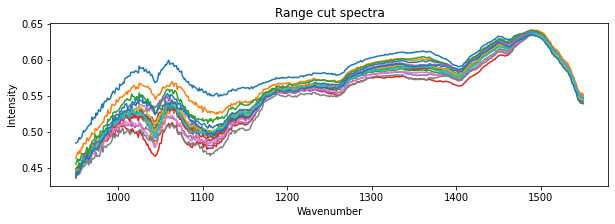

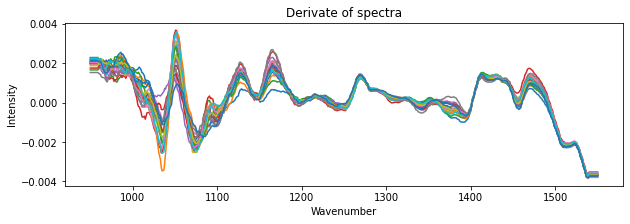

In [4]:
plot_spectra(range_cut_spectra, "Range cut spectra", "Wavenumber", "Intensity")
plot_spectra(derivate_spectra, "Derivate of spectra", "Wavenumber", "Intensity")

## Use cross validation to find the best model

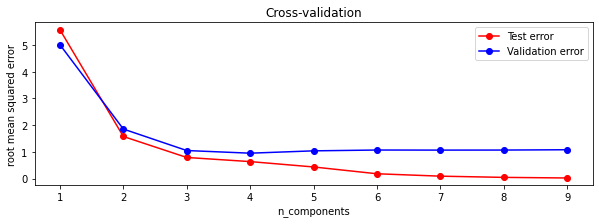

MSE:


In [5]:
cross_validation(derivate_spectra, train_hplc.glucose, n_folds=5, n_components=2)

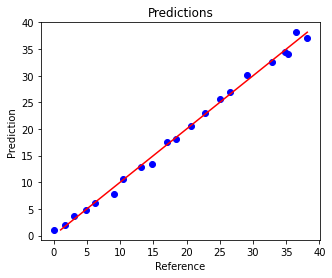

In [6]:
model = MBPLS(n_components=3, method='NIPALS')
prediction = model.fit_predict(derivate_spectra, train_hplc.glucose)
plot_predictions(predictions=prediction, reference=train_hplc.glucose)

In [7]:
fermentation_spectra, fermentation_hplc = load_fermentation_data()

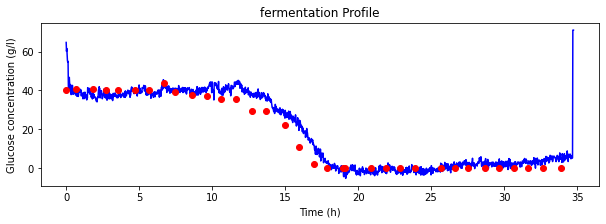

In [8]:
fermentation_spectra_range_cut = range_cut.apply_to(fermentation_spectra)
fermentation_spectra_derivate = derivate.apply_to(fermentation_spectra_range_cut)

prediction = model.predict(fermentation_spectra_derivate)
plot_fermentation(prediction, fermentation_hplc)
